In [66]:
import pandas as pd
import plotly.express as px

In [67]:
df = pd.read_csv('/Users/magnosouza/PycharmProjects/IntroducaoAnaliseDados/archive/Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [68]:
df.isna().any()

hour_of_day    False
cash_type      False
money          False
coffee_name    False
Time_of_Day    False
Weekday        False
Month_name     False
Weekdaysort    False
Monthsort      False
Date           False
Time           False
dtype: bool

In [69]:
df.duplicated().any()

np.False_

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [71]:
df.describe().round(2)

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.00,3547.00,3547.00,3547.00
mean,14.19,31.65,3.85,6.45
std,4.23,4.88,1.97,3.50
min,6.00,18.12,1.00,1.00
25%,10.00,27.92,2.00,3.00
50%,14.00,32.82,4.00,7.00
75%,18.00,35.76,6.00,10.00
max,22.00,38.70,7.00,12.00


In [72]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [73]:
df_tipo = df.groupby('coffee_name')['hour_of_day'].count().reset_index().rename(columns={'hour_of_day':'total'}).sort_values(by='total', ascending=False)

df_tipo['percentual'] = (
    (df_tipo['total'] / df_tipo['total'].sum() * 100).round(2).astype(str) + '%')
df_tipo


,coffee_name,total,percentual
1,Americano with Milk,809,22.81%
7,Latte,757,21.34%
0,Americano,564,15.9%
2,Cappuccino,486,13.7%
4,Cortado,287,8.09%
6,Hot Chocolate,276,7.78%
3,Cocoa,239,6.74%
5,Espresso,129,3.64%


In [74]:
df_dia = df.groupby('Weekday')['money'].count().reset_index().rename(columns={'money':'total'}).sort_values(by='total', ascending=False)

df_dia['percentual'] = (df_dia['total'] / df_dia['total'].sum() * 100).round(2).astype(str) + '%'

df_dia

,Weekday,total,percentual
5,Tue,572,16.13%
1,Mon,544,15.34%
0,Fri,532,15.0%
4,Thu,510,14.38%
6,Wed,500,14.1%
2,Sat,470,13.25%
3,Sun,419,11.81%


In [75]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [76]:
mes = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

df['mes'] = df['Month_name'].map(mes)

df_mes = df.groupby(['mes', 'Month_name'])['money'].count().reset_index().rename(columns={'money':'total'}).sort_values(by='mes', ascending=True)

df_mes['percentual'] = ((df_mes['total'] / df_mes['total'].sum() * 100).round(2).astype(str) + '%')

df_mes


,mes,Month_name,total,percentual
0,1,Jan,201,5.67%
1,2,Feb,423,11.93%
2,3,Mar,494,13.93%
3,4,Apr,168,4.74%
4,5,May,241,6.79%
5,6,Jun,223,6.29%
6,7,Jul,237,6.68%
7,8,Aug,272,7.67%
8,9,Sep,344,9.7%
9,10,Oct,426,12.01%


In [77]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,mes
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3


In [78]:
df_cash = df.groupby('cash_type')['mes'].count().reset_index().rename(columns={'mes':'total'}).sort_values(by='total', ascending=False)

df_cash['percentual'] = ((df_cash['total'] / df_cash['total'].sum() * 100).round(2).astype(str) + '%')

df_cash

,cash_type,total,percentual
0,card,3547,100.0%


In [79]:
hora = {
    6:1,
    7:2,
    8:3,
    9:4,
    10:5,
    11:6,
    12:7,
    13:8,
    14:9,
    15:10,
    16:11,
    17:12,
    18:13,
    19:14,
    20:15,
    21:16,
    22:16
}

df['hora'] = df['hour_of_day'].map(hora)
df_hora = df.groupby(['hora' ,'hour_of_day', 'Time_of_Day'])['mes'].count().reset_index().rename(columns={'mes':'total'}).sort_values(by='hora', ascending=True)
df_hora['percentual'] = ((df_hora['total'] / df_hora['total'].sum() * 100).round(2).astype(str) + '%')
df_hora

,hora,hour_of_day,Time_of_Day,total,percentual
0,1,6,Morning,5,0.14%
1,2,7,Morning,88,2.48%
2,3,8,Morning,235,6.63%
3,4,9,Morning,242,6.82%
4,5,10,Morning,328,9.25%
5,6,11,Morning,283,7.98%
6,7,12,Afternoon,241,6.79%
7,8,13,Afternoon,225,6.34%
8,9,14,Afternoon,225,6.34%
9,10,15,Afternoon,236,6.65%


In [80]:
df_grafico_hora = px.line(
    df_hora,
    x='hour_of_day',
    y='percentual',
    color='Time_of_Day'
)
df_grafico_hora.show()

In [81]:
periodo = {
    'Morning':1,
    'Afternoon':2,
    'Night':3
}

df['periodo'] = df['Time_of_Day'].map(periodo)
df_periodo = df.groupby(['periodo' ,'Time_of_Day'])['hour_of_day'].count().reset_index().rename(columns={'hour_of_day': 'total'}).sort_values(by='periodo', ascending=True)

df_periodo['percentual'] = ((df_periodo['total'] / df_periodo['total'].sum()) * 100).round(2).astype(str) + '%'
df_periodo

,periodo,Time_of_Day,total,percentual
0,1,Morning,1181,33.3%
1,2,Afternoon,1205,33.97%
2,3,Night,1161,32.73%


In [82]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,mes,hora,periodo
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3,5,1
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3,7,2
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3,7,2
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3,8,2
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3,8,2


In [83]:
df_dia_semana = df.groupby(['Weekdaysort', 'Weekday'])['Time_of_Day'].count().reset_index().rename(columns={'Time_of_Day': 'total'}).sort_values(by='Weekdaysort', ascending=True)
df_dia_semana['percentual_num'] = (df_dia_semana['total'] / df_dia_semana['total'].sum() * 100).round(2)
df_dia_semana['percentual_uni'] = df_dia_semana['percentual_num'].astype(str) + '%'
df_dia_semana['percentual'] = df_dia_semana['percentual_num'].cumsum().round(2).astype(str) + '%'
df_dia_semana

,Weekdaysort,Weekday,total,percentual_num,percentual_uni,percentual
0,1,Mon,544,15.34,15.34%,15.34%
1,2,Tue,572,16.13,16.13%,31.47%
2,3,Wed,500,14.10,14.1%,45.57%
3,4,Thu,510,14.38,14.38%,59.95%
4,5,Fri,532,15.00,15.0%,74.95%
5,6,Sat,470,13.25,13.25%,88.2%
6,7,Sun,419,11.81,11.81%,100.01%


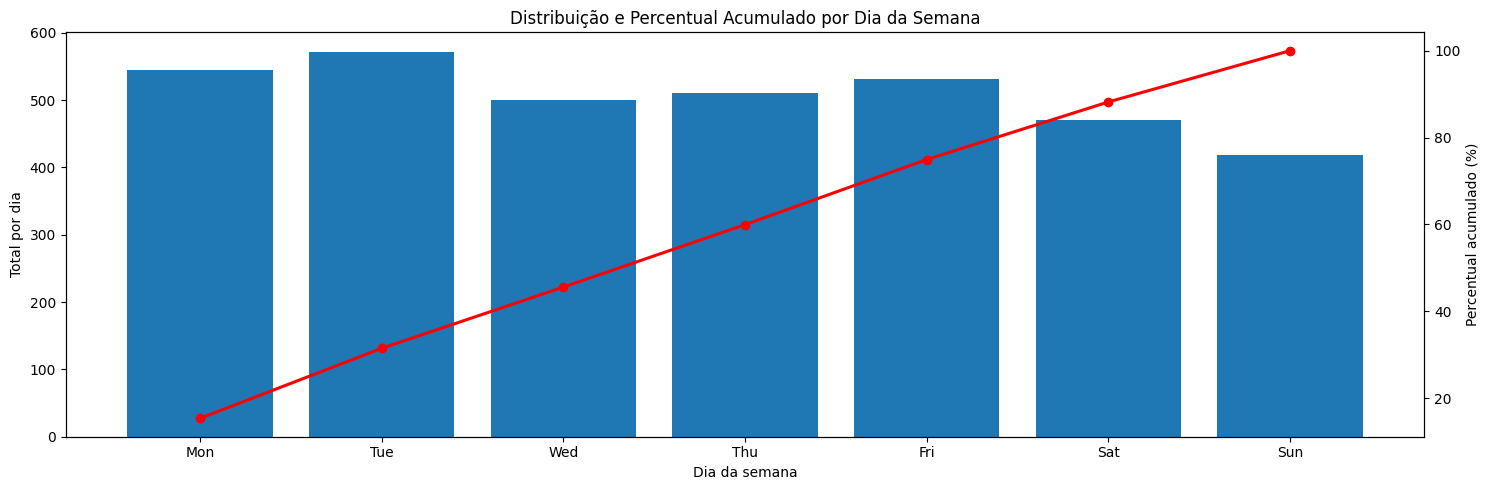

In [87]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

# Barras (cor padrão ou escolha a sua)
ax1.bar(df_dia_semana['Weekday'], df_dia_semana['total'])
ax1.set_ylabel('Total por dia')
ax1.set_xlabel('Dia da semana')


# Linha do acumulado com cor destacada
ax2 = ax1.twinx()
ax2.plot(
    df_dia_semana['Weekday'],
    df_dia_semana['percentual_num'].cumsum(),
    marker='o',
    linewidth=2.2,
    color='red'   # aqui você muda a cor
)
ax2.set_ylabel('Percentual acumulado (%)')

plt.title('Distribuição e Percentual Acumulado por Dia da Semana')
plt.tight_layout()
plt.show()



In [85]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,mes,hora,periodo
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3,5,1
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3,7,2
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3,7,2
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3,8,2
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3,8,2


In [86]:
df_date = (
    df.groupby('Date')['hora']
      .count()
      .reset_index()
      .rename(columns={'hora': 'total'})
      .sort_values(by='Date', ascending=False)
)

df_date['percentual_num'] = (df_date['total'] / df_date['total'].sum() * 100).round(2)
df_date['percentual'] = df_date['percentual_num'].astype(str) + '%'

# soma acumulada dos percentuais
df_date['soma_percentual'] = df_date['percentual_num'].cumsum().round(2).astype(str) + '%'

df_date.head(20)


,Date,total,percentual_num,percentual,soma_percentual
380,2025-03-23,6,0.17,0.17%,0.17%
379,2025-03-22,12,0.34,0.34%,0.51%
378,2025-03-21,20,0.56,0.56%,1.07%
377,2025-03-20,20,0.56,0.56%,1.63%
376,2025-03-19,21,0.59,0.59%,2.22%
375,2025-03-18,17,0.48,0.48%,2.7%
374,2025-03-17,13,0.37,0.37%,3.07%
373,2025-03-16,5,0.14,0.14%,3.21%
372,2025-03-15,7,0.20,0.2%,3.41%
371,2025-03-14,23,0.65,0.65%,4.06%


In [88]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,mes,hora,periodo
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3,5,1
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3,7,2
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3,7,2
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3,8,2
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3,8,2


In [95]:
df_valor = df.groupby('coffee_name')['money'].sum().reset_index().rename(columns={'money':'total'}).sort_values(by='total', ascending=False)

df_valor['percentual_num'] = (df_valor['total'] / df_valor['total'].sum() * 100).round(2)
df_valor['percentual'] = df_valor['percentual_num'].round(2).astype(str) + '%'

df_valor['percentual_acumulado'] = df_valor['percentual_num'].cumsum().round(2).astype(str) + '%'
df_valor

,coffee_name,total,percentual_num,percentual,percentual_acumulado
7,Latte,26875.30,23.94,23.94%,23.94%
1,Americano with Milk,24751.12,22.05,22.05%,45.99%
2,Cappuccino,17439.14,15.54,15.54%,61.53%
0,Americano,14650.26,13.05,13.05%,74.58%
6,Hot Chocolate,9933.46,8.85,8.85%,83.43%
3,Cocoa,8521.16,7.59,7.59%,91.02%
4,Cortado,7384.86,6.58,6.58%,97.6%
5,Espresso,2690.28,2.40,2.4%,100.0%


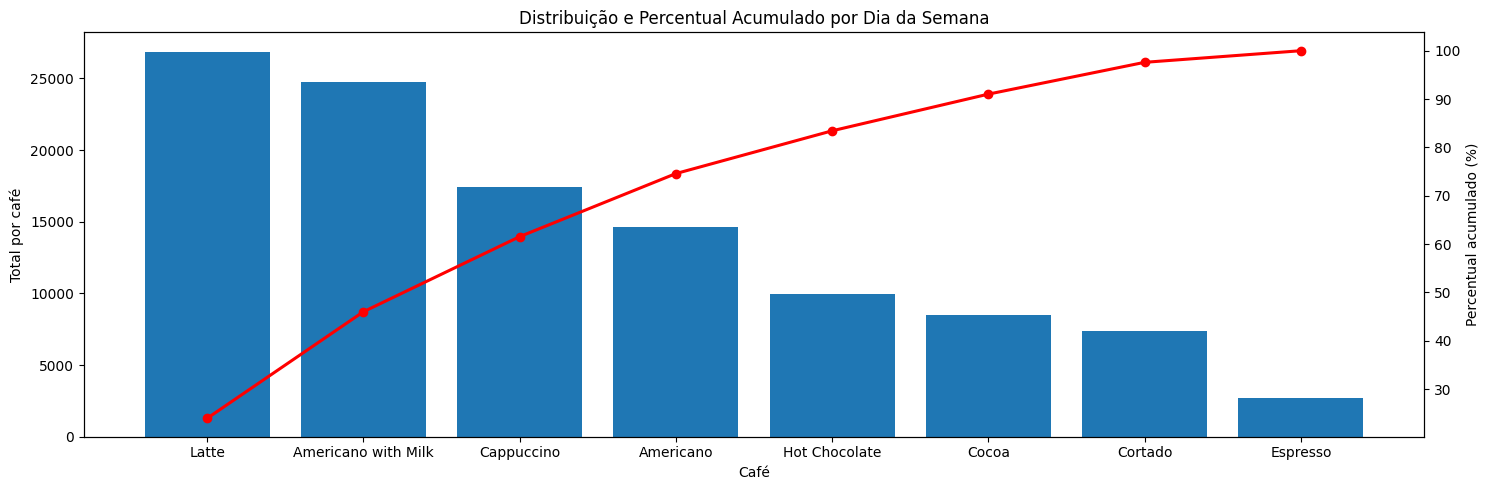

In [97]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

# Barras (cor padrão ou escolha a sua)
ax1.bar(df_valor['coffee_name'], df_valor['total'])
ax1.set_ylabel('Total por café')
ax1.set_xlabel('Café')


# Linha do acumulado com cor destacada
ax2 = ax1.twinx()
ax2.plot(
    df_valor['coffee_name'],
    df_valor['percentual_num'].cumsum(),
    marker='o',
    linewidth=2.2,
    color='red'   # aqui você muda a cor
)
ax2.set_ylabel('Percentual acumulado (%)')

plt.title('Distribuição e Percentual Acumulado por Dia da Semana')
plt.tight_layout()
plt.show()